# TAIRP Tech-A-Intern Internship Pogram


### Priya Singh

### TASK 2- Customer Segmentation

#### This project covers the following topics:

* Reading an Excel file into a Pandas data frame

* Retrieving data from Pandas data frames

* Cleaning and analyzing the data

* Extracting useful information from data

* Clustering of data into segments by using K-Means

* Basic plotting using line and bar charts

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
     

In [2]:
df=pd.read_csv("marketing_campaign.csv", sep="\t")
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### Let's clean our data by removing null values from our dataset.

In [5]:
#dropping null values
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [7]:
#Converting the column Dt_Customer to datetime from object as it should be
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9352\3222588001.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

#### Let's rename the column Dt_Customer to Customer_Enrollment_Date as it would make more sense and increase readability



In [9]:
df.rename(columns = {'Dt_Customer':'Customer_Enrollment_Date'}, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2216 non-null   int64         
 1   Year_Birth                2216 non-null   int64         
 2   Education                 2216 non-null   object        
 3   Marital_Status            2216 non-null   object        
 4   Income                    2216 non-null   float64       
 5   Kidhome                   2216 non-null   int64         
 6   Teenhome                  2216 non-null   int64         
 7   Customer_Enrollment_Date  2216 non-null   datetime64[ns]
 8   Recency                   2216 non-null   int64         
 9   MntWines                  2216 non-null   int64         
 10  MntFruits                 2216 non-null   int64         
 11  MntMeatProducts           2216 non-null   int64         
 12  MntFishProducts     

In [11]:
df.shape

(2216, 29)

#### We create a list dates, where we store the dates of enrollment of customers and also get the date of the oldest as well as newest customer

In [12]:
dates=[]
for i in df['Customer_Enrollment_Date']:
  i=i.date()
  dates.append(i)
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))
     

The newest customer's enrolment date in the records: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


#### We add a new column in our dataframe called Customer_For_Days, which shows how many days it has been since the enrollment of customer.

In [13]:
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For_Days"] = days
df['Customer_For_Days']

0      971 days
1      125 days
2      472 days
3       65 days
4      321 days
         ...   
2235   541 days
2236    61 days
2237   315 days
2238   316 days
2239   782 days
Name: Customer_For_Days, Length: 2216, dtype: timedelta64[ns]

#### Now  we have the total number of days since enrollment available with us, so  convert the column into integer type, showing only number of days since enrollment.

In [14]:
df['Customer_For_Days']=df['Customer_For_Days'].dt.days
df['Customer_For_Days']

0       971
1       125
2       472
3        65
4       321
       ... 
2235    541
2236     61
2237    315
2238    316
2239    782
Name: Customer_For_Days, Length: 2216, dtype: int64

#### Let's try to get the total categories available in the feature of Martial_Status and Education to gain some more insights.

In [15]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())
#the function value_counts() returns the number of occurence of each value in the series, along with the value

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [16]:
df['Age']=2023-df['Year_Birth']
df['Age']
#Adding a new column Age to get the  customer current age    

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2216, dtype: int64

 #### Customers have purchased various different items,  get the total amount spent by a customer, and add the respective column in our dataframe.

In [17]:
#Adding a new column Spent, displaying total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df['Spent']
     

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Spent, Length: 2216, dtype: int64

#### Deriving the living situation of the customers according to their martial status.

In [18]:
#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone",
                                                "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
df['Living_With']

0         Alone
1         Alone
2       Partner
3       Partner
4       Partner
         ...   
2235    Partner
2236    Partner
2237      Alone
2238    Partner
2239    Partner
Name: Living_With, Length: 2216, dtype: object

#### Drive the total number of children in a household.

In [19]:
#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]
df['Children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2216, dtype: int64

#### At last,determine the size of the family.

In [20]:
#Feature for total members in the household
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]
df['Family_Size']

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2216, dtype: int64

#### So the Feature Engineering is done, we can drop the columns which are no longer of any use.



In [21]:
#Dropping columns that are no longer of any use
df.drop(["Marital_Status", "Customer_Enrollment_Date", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID",'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response'],axis=1,inplace=True)
     

In [22]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For_Days,Age,Spent,Children,Family_Size
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,512.006318,54.179603,607.075361,0.947202,2.592509
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,232.469034,11.985554,602.900476,0.749062,0.905722
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,1.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,340.000000,46.000000,69.000000,0.000000,2.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,513.000000,53.000000,396.500000,1.000000,3.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,686.000000,64.000000,1048.000000,1.000000,3.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1063.000000,130.000000,2525.000000,3.000000,5.000000


#### Now clean our data by removing outliers.

In [23]:
#Removing outliers
df = df[(df["Age"]<80)]
df = df[(df["Income"]<250000)]
df.shape
     

(2204, 22)

#### We can see that by removing outliers, the number of rows decreased from 2216 to 2204.

##### Now, we can proceed further with our dataset for Customer Segmentation by using K-Means Clustering. We will cluster our dataset by taking into consideration, two columns: 
##### Spent (Total money spent by a customer) and Income (Total income of a customer).
##### I will create a separate dataset for that which will include only those two columns.

In [24]:
df2=df[['Spent','Income']].copy()

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit_predict(df2)
  wcss.append(km.inertia_)

wcss

[1022286022845.39,
 317728994142.3328,
 182691457994.76297,
 121967040583.27051,
 80620134570.50594,
 53340781505.29004,
 39887092662.21273,
 31042862213.907803,
 23902328873.68104,
 18922453106.097675]

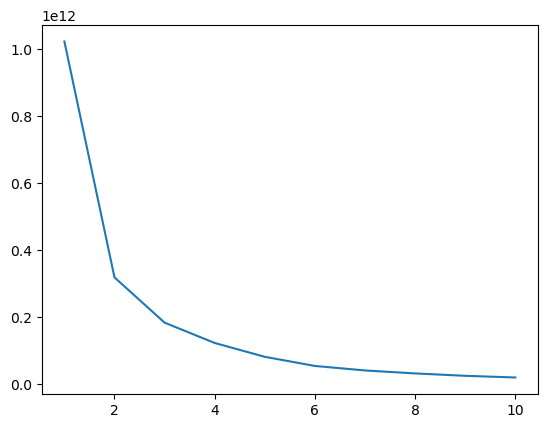

In [25]:
plt.plot(range(1,11),wcss)
plt.show()

#### Here, we can see from the graph that the number of clusters needed are not exactly clear due to the variation in the dataset. 
#### Thus, we need to scale the dataset, and cluster that dataset.

In [26]:
from sklearn.preprocessing import StandardScaler

dfcpy=df.copy() #Creating a copy of dataframe

#Dropping columns not containing numerical values
dfcpy.drop(['Living_With','Education'],axis=1,inplace=True)
scaler = StandardScaler()
scaler.fit(dfcpy)
scaled_df = pd.DataFrame(scaler.transform(dfcpy),columns= dfcpy.columns)
     

In [27]:
scaled_df


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For_Days,Age,Spent,Children,Family_Size
0,0.289185,-0.825260,-0.932849,0.312269,0.983966,1.549100,1.693308,2.463290,1.481754,0.849985,0.348643,1.429448,2.514695,-0.554429,0.690032,1.972255,1.034452,1.681199,-1.270584,-1.766768
1,-0.258651,1.036432,0.904505,-0.378389,-0.870843,-0.637261,-0.716537,-0.648566,-0.633691,-0.733980,-0.170552,-1.123930,-0.568978,-1.170338,-0.134713,-1.662723,1.292849,-0.961206,1.401522,0.445079
2,0.915103,-0.825260,-0.932849,-0.792783,0.362724,0.569007,-0.176553,1.346683,-0.147382,-0.038581,-0.689748,1.429448,-0.226347,1.293296,-0.547086,-0.171781,0.345390,0.283550,-1.270584,-0.660845
3,-1.173630,1.036432,-0.932849,-0.792783,-0.870843,-0.561869,-0.654059,-0.502126,-0.585060,-0.753296,-0.170552,-0.759162,-0.911608,-0.554429,0.277659,-1.920523,-1.291130,-0.917997,0.065469,0.445079
4,0.296384,1.036432,-0.932849,1.555452,-0.389306,0.418223,-0.216717,0.156855,-0.001489,-0.560130,1.387034,0.335143,0.116283,0.061479,-0.134713,-0.820577,-1.032732,-0.304759,0.065469,0.445079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,0.432484,-0.825260,0.904505,-0.102126,1.203928,0.418223,0.068894,0.083635,2.211217,3.921330,-0.170552,1.794217,0.116283,-0.554429,-0.134713,0.124689,0.173125,1.222518,0.065469,0.445079
2200,0.562127,2.898123,0.904505,0.243203,0.303275,-0.662391,-0.609432,-0.685177,-0.658007,-0.695346,2.425425,1.429448,-0.226347,-0.246475,0.690032,-1.937710,1.981911,-0.268198,2.737575,2.656927
2201,0.235442,-0.825260,-0.932849,1.451854,1.795446,0.543876,0.225088,-0.099415,-0.366221,-0.386280,-0.689748,-0.759162,0.116283,2.217159,0.277659,-0.846357,-1.032732,1.056329,-1.270584,-1.766768
2202,0.805109,-0.825260,0.904505,-1.414375,0.368669,0.091526,0.211700,0.779227,0.071457,0.328435,-0.170552,0.699912,0.801543,1.293296,-0.959459,-0.842060,1.120584,0.394896,0.065469,0.445079


#### The dataset is scaled. We will use this dataset to perform K-Means clustering.

In [28]:
scaled_df2=scaled_df[['Spent','Income']].copy()

wcss=[]
for i in range(1,6):
  km=KMeans(n_clusters=i)
  km.fit_predict(scaled_df2)
  wcss.append(km.inertia_)

wcss

[4408.0,
 1400.5232921443778,
 920.4840698762007,
 668.0708008939514,
 557.530943977582]

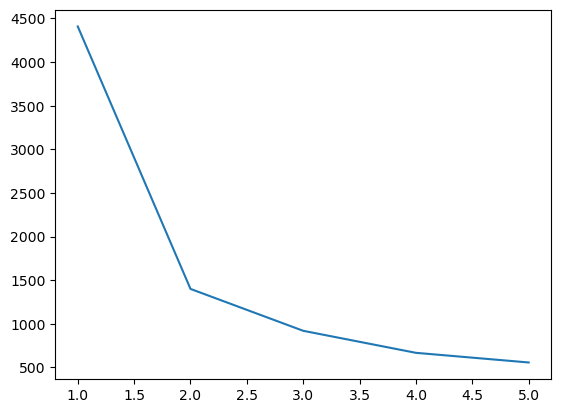

In [29]:
plt.plot(range(1,6),wcss)
plt.show()

#### Here if we look carefully, we can see that after reaching the elbow point of 4, the slope has been decreased and is constant afterwards. 
#### This signifies that the number of clusters formed could be 4.

In [30]:
X=df2.iloc[:,:].values
km=KMeans(n_clusters=4)
y_mean=km.fit_predict(X)
y_mean

array([1, 3, 1, ..., 1, 1, 1])

In [31]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (6, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
legend_scatter=True
sns.scatterplot(x=X[y_means== 0, 0],y=X[y_means== 0,1],data=X)
sns.scatterplot(x=X[y_means== 1, 0],y=X[y_means== 1,1],data=X)
sns.scatterplot(x=X[y_means== 2, 0],y=X[y_means== 2,1],data=X)
sns.scatterplot(x=X[y_means== 3, 0],y=X[y_means== 3,1],data=X)
plt.legend(['Cluster 1','Cluster 2','Cluster 3','Cluster 4'], loc=0, frameon=legend_scatter)
plt.xlabel("Spent")
plt.ylabel("Income")
plt.show()

NameError: name 'y_means' is not defined

#### Here as we have plotted the scatterplot and the clusters are visible to us, we can classify each cluster now on the basis of their characteristics.

Cluster 1 represents customers with low spending and average income

Cluster 2 represents customers with high spending and high income

Cluster 3 represents people with low spending and low income

Cluster 4 represents customers with average spending and high income

## Conclusion: The customers could be divided into 4 groups, considering their income and the amount they spend in the company.

In [ ]:
df.info()

#### We can also do some further analysis from our dataset. 
#### We can plot a histogram of the age of customers to extract some insights from it.

In [ ]:
sns.histplot(df.Age,color='green')


## Conclusion: We can find that most of the customers are from 50 to 60 years old.
#### We can plot a simple barplot comparing the age of the customer to the number of days since the customer has been enrolled.

In [ ]:
sns.barplot(x=df.Age.head(15),y=df.Customer_For_Days.head(15))


#### We can plot a scatter plot, showing the average amount spent by a customer from the time of enrollment, based on the family size of the customer.

In [ ]:
sns.scatterplot(x=df.Customer_For_Days,y=df.Spent,hue=df.Family_Size)
